In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/t9/p_t5rsf92s38bb58_mfpk3rm0000gn/T/ipykernel_24376/687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
df = pd.read_csv('/Users/vladimiregorov/Downloads/archive (1)/AB_NYC_2019.csv')

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [48]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [49]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df.drop(columns=['name', 'host_name', 'host_id', 'last_review', 'reviews_per_month'], inplace = True)

In [11]:
data = df.neighbourhood_group.value_counts().reset_index()
data

,neighbourhood_group,count
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


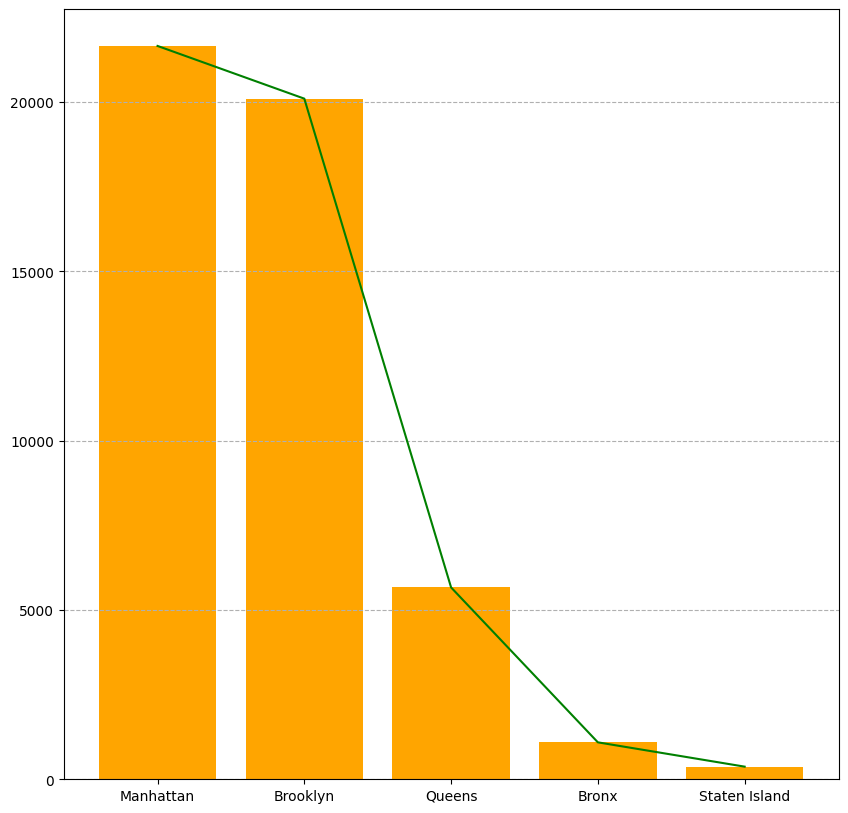

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
x = data['neighbourhood_group']
y = data['count']
ax.plot(x,y, color='green')
ax.bar(x,y, color='orange')
plt.grid(axis='y', linestyle='--')


In [102]:
df.head(2)

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355


In [13]:
exp = df[df['price'] > 500]

In [14]:
df = df[df['price'] <= 500]

<Axes: >

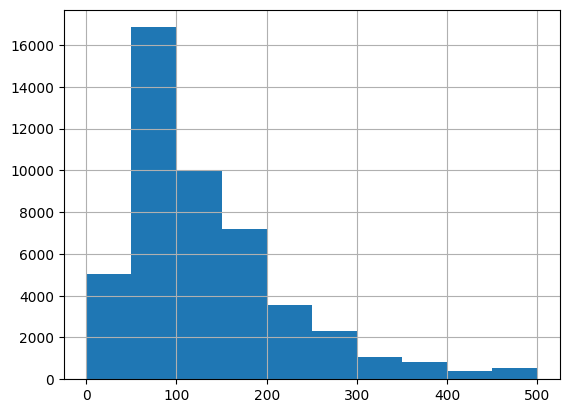

In [15]:
df.price.hist()

In [16]:
data2 = df.groupby('neighbourhood_group').agg({'price' : 'mean'}).reset_index()
data2 

,neighbourhood_group,price
0,Bronx,81.742620
1,Brooklyn,112.628226
2,Manhattan,163.247989
3,Queens,92.850807
4,Staten Island,91.144414


<BarContainer object of 5 artists>

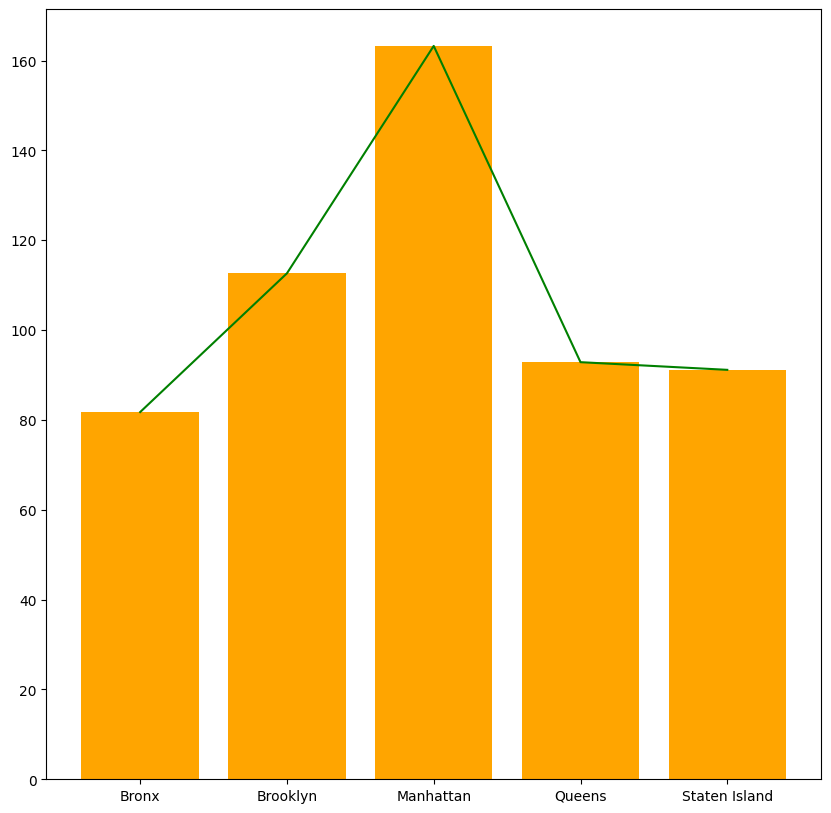

In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
x = data2['neighbourhood_group']
y = data2['price']
ax.plot(x,y, color='green')
ax.bar(x,y, color='orange')

In [18]:
df.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


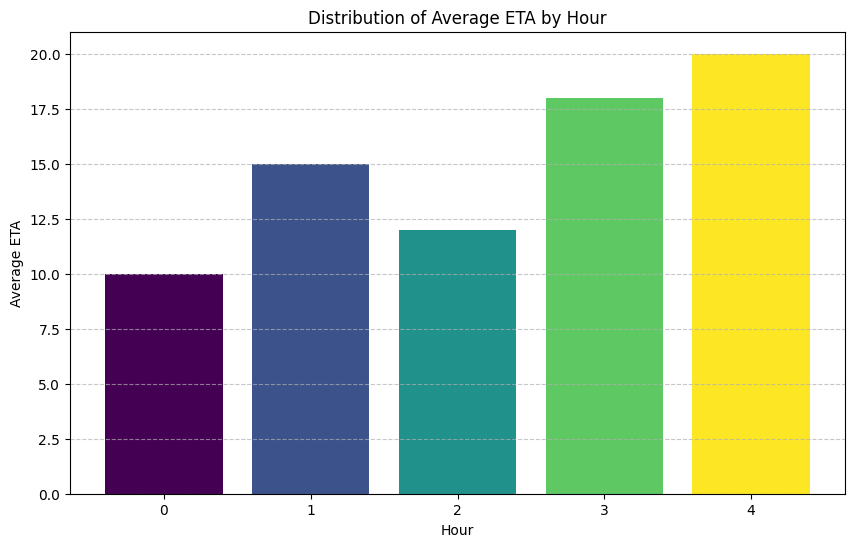

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Пример данных
data = pd.DataFrame({
    'hour': [0, 1, 2, 3, 4],
    'average_eta': [10, 15, 12, 18, 20]
})

# Создание гистограммы с использованием цветовой карты 'viridis'
plt.figure(figsize=(10, 6))
plt.bar(data['hour'], data['average_eta'], color=plt.get_cmap('viridis')(data['hour'] / max(data['hour'])))
plt.title('Distribution of Average ETA by Hour')
plt.xlabel('Hour')
plt.ylabel('Average ETA')
plt.xticks(data['hour'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [19]:
data3 = df.groupby('neighbourhood_group').agg({'price' : 'mean'})
data3

,price
neighbourhood_group,
Bronx,81.742620
Brooklyn,112.628226
Manhattan,163.247989
Queens,92.850807
Staten Island,91.144414


In [20]:
df = df.merge(data3, how='left', left_on='neighbourhood_group', right_on='neighbourhood_group')

In [21]:
df.rename(columns=({'price_y' : 'avg_price'}), inplace=True)

In [22]:
df['delta'] = df['avg_price']- df['price_x']

In [23]:
df.head(2)

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price_x,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,avg_price,delta
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,112.628226,-36.371774
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,163.247989,-61.752011


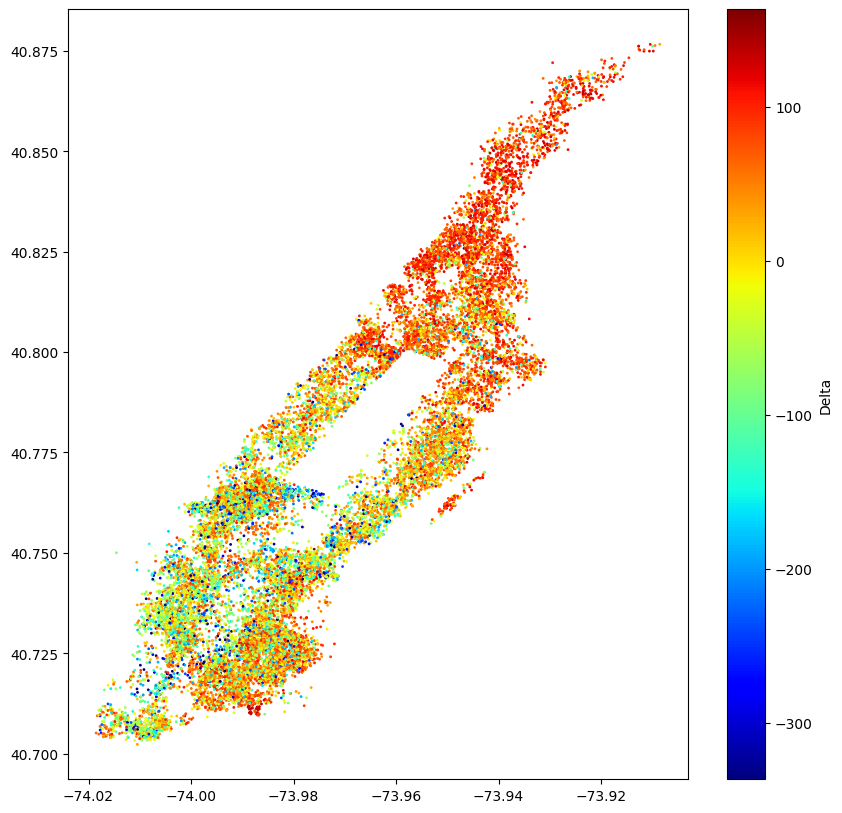

In [24]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
x = df.loc[df['neighbourhood_group'] == 'Manhattan', 'longitude']
y = df.loc[df['neighbourhood_group'] == 'Manhattan', 'latitude']
graph = ax.scatter(x, y, c=df.loc[df['neighbourhood_group'] == 'Manhattan', 'delta'], cmap= 'jet', s=1, alpha=1)
plt.colorbar(graph, ax=ax, label='Delta')

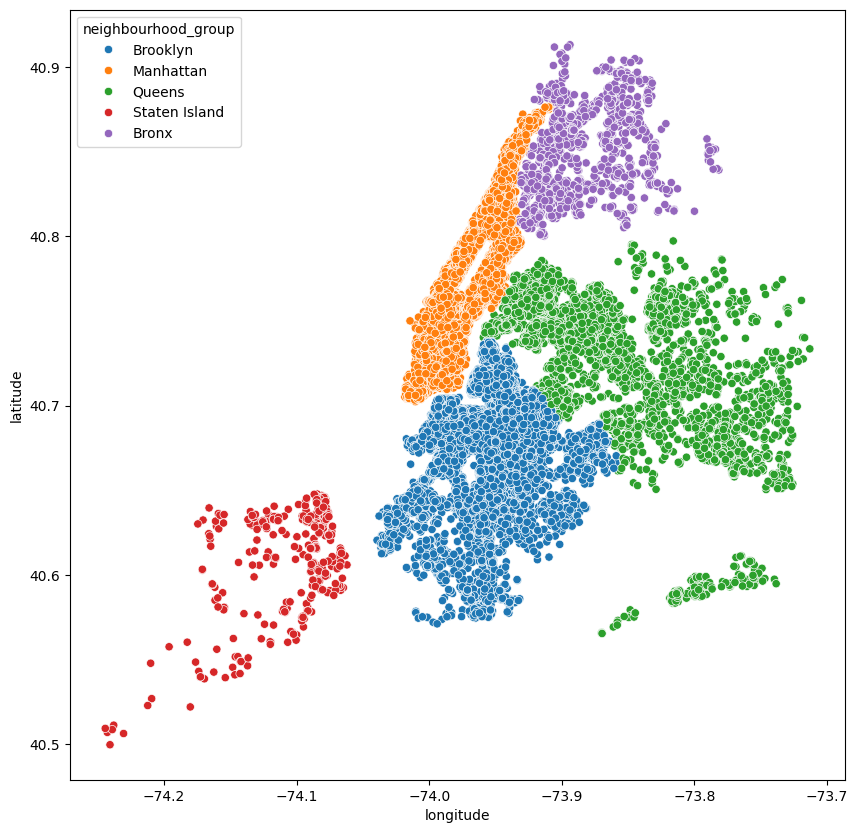

In [25]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.neighbourhood_group)
plt.show()


In [26]:
df.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price_x,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,avg_price,delta
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,112.628226,-36.371774
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,163.247989,-61.752011
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,163.247989,13.247989
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,112.628226,23.628226
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,163.247989,83.247989


In [27]:
d = df.groupby(['neighbourhood_group', 'room_type']).agg({'price_x' : 'mean'}).reset_index()
d

,neighbourhood_group,room_type,price_x
0,Bronx,Entire home/apt,122.486702
1,Bronx,Private room,61.272727
2,Bronx,Shared room,47.254237
3,Brooklyn,Entire home/apt,159.847459
4,Brooklyn,Private room,71.410797
5,Brooklyn,Shared room,48.890777
6,Manhattan,Entire home/apt,203.861626
7,Manhattan,Private room,103.544060
8,Manhattan,Shared room,84.085954
9,Queens,Entire home/apt,138.751684


<Axes: xlabel='neighbourhood_group', ylabel='price_x'>

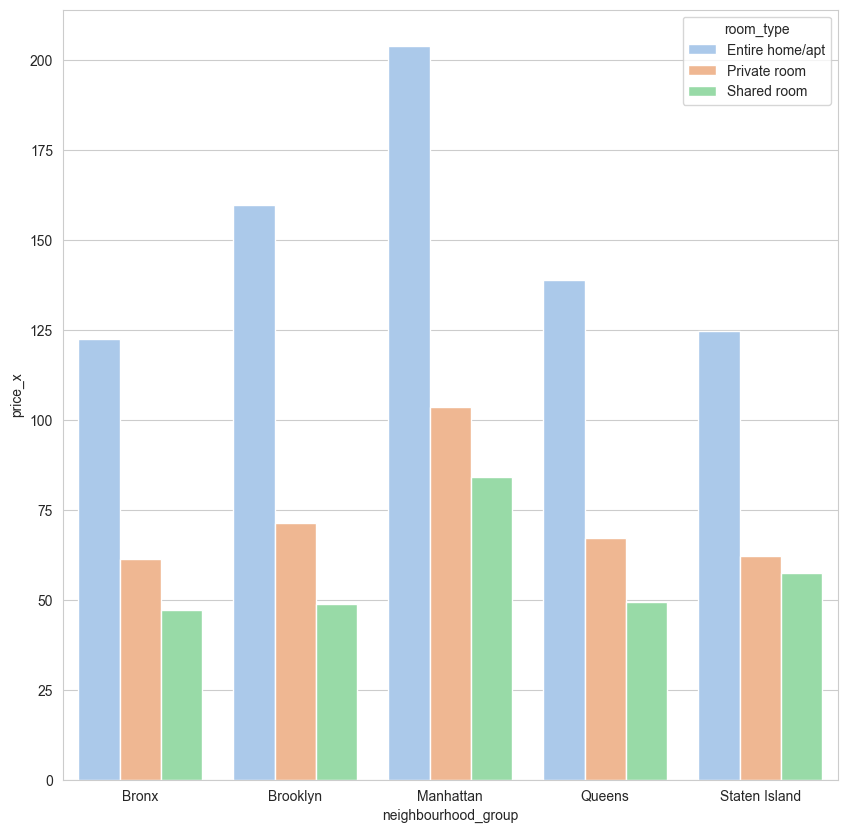

In [41]:
fig = plt.figure(figsize=(10,10))
sns.set_style("whitegrid")  
ax = fig.add_subplot()
x = d['neighbourhood_group']
y = d['price_x']
sns.barplot(x=x,y=y, hue=d.room_type)